<a href="https://colab.research.google.com/github/shivanshudwivedi/Deep-Learning/blob/main/TenserFlow_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

#Create 2 constant matrices

'''Creates a constant op that produces a 1x2 matrix. The op is added as a node to the default graph. The value returned by the constructor represents
the output of the constant op. '''
matrix1 = tf.constant([[3,3]])

'''Creates a constant op that produces a 2x1 matrix. '''
matrix2 = tf.constant([[2], [2]])

#Matrix multiplication of 2 matrices
'''Create a Matmul op that stores the matrix multiplication of the matrices 1 and 2'''
product = tf.matmul(matrix1, matrix2)
print(product)

#Subtract 'a' from 'x'

x = tf.Variable([1.0 , 3.0])
a = tf.constant([3.0, 3.0])
sub = tf.subtract(x, a)
print(sub)



tf.Tensor([[12]], shape=(1, 1), dtype=int32)
tf.Tensor([-2.  0.], shape=(2,), dtype=float32)


In [ ]:
#Simple Tensorfllow regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv('/content/sample_data/california_housing_test.csv',
                 na_values = ['NA', '?'])
house = df['latitude']

#Handle Missing Values by filling with median of that column
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
print(df)

#Pandas to NumPy
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
y = df['latitude'].values

#Building the Neural Network

model = Sequential()
model.add(Dense(25, input_dim = x.shape[1], activation = 'relu')) #Hidden Layer 1
model.add(Dense(10, activation = 'relu')) #Hidden Layer 2
model.add(Dense(1)) #Output Layer
model.compile(loss = 'mean_squared_error', optimizer = 'adam') #Compiling the neural network
model.fit(x, y, verbose = 2, epochs = 100) #Fitting the data and epochs means the number of iterations of training it goes through

#Predicting the output using the model

pred = model.predict(x)
print("Predictions", pred[0:10])

#Measure RMSE to calculate the accuracy of the predictions
score = np.sqrt(metrics.mean_squared_error(pred, y))
print("Final Score: ", score)



      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

In [ ]:
#Simple Classification using Tensorflow
import pandas as pd
import numpy as np
import io
import requests
from sklearn.metrics import accuracy_score
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

file_path = "/content/sample_data/IRIS.csv"
df = pd.read_csv(file_path, skiprows = 1, na_values = ['NA', '?'])
column_names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']
df.columns = column_names

#Convert to NumPy Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species'])
species = dummies.columns
y = dummies.values

#Building Neural Network
model = Sequential()
model.add(Dense(50, input_dim = x.shape[1], activation = 'relu')) #Hidden 1
model.add(Dense(25, activation = 'relu')) #Hidden 2
model.add(Dense(y.shape[1], activation = 'softmax')) #Output

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
model.fit(x, y, verbose = 2, epochs = 100)

#Predicting the output
pred = model.predict(x)
predict_classes = np.argmax(pred, axis = 1)
expected_classes = np.argmax(y, axis = 1)
print("Predictions: ", predict_classes)
print("Expected Classes: ", expected_classes)


In [ ]:
#Saving and Loading Neural Networks
import pandas as pd
import numpy as np
import io
import os
import requests
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

save_path = '.'

file_path = "/content/sample_data/IRIS.csv"
df = pd.read_csv(file_path, skiprows = 1, na_values = ['NA', '?'])
column_names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']
df.columns = column_names

# Handling missing values
df['sepal_l'] = df['sepal_l'].fillna(df['sepal_l'].median())

#Pandas to NumPy
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species'])
species = dummies.columns
y = dummies.values

#Buliding the Neural Network
model = Sequential()
model.add(Dense(50, input_dim = x.shape[1], activation = 'relu')) #Hidden 1
model.add(Dense(25, activation = 'relu')) #Hidden 2
model.add(Dense(y.shape[1], activation = 'softmax')) #Output

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
model.fit(x, y, verbose = 2, epochs = 200)

#Predicting the output values
pred = model.predict(x)

#Measure RMSE error
score = np.sqrt(metrics.mean_squared_error(pred, y))
print(score)

#Saving NN to Json file
model_json = model.to_json()
with open(os.path.join(save_path, 'network.json'), 'w') as json_file:
  json_file.write(model_json)

#Saving NN to Yaml file
model_yaml = model.to_json()
with open(os.path.join(save_path, 'network.yaml'), 'w') as yaml_file:
  yaml_file.write(model_yaml)

#Saving NN to HDF5
model.save(os.path.join(save_path, 'network.h5'))

#Reloading a saved model for reuse
from tensorflow.keras.models import load_model
model2 = load_model(os.path.join(save_path, 'network.h5'))
pred = model2.predict(x)

#Measure the RMSE value of the given prediction
score = np.sqrt(metrics.mean_squared_error(pred, y))
print('Score after loading', score)

In [ ]:
#Early stopping with Classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import io
import os
import requests


df = pd.read_csv('/content/sample_data/IRIS.csv', na_values = ['NA', '?'])
column_names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']
df.columns = column_names

#Convert to NumPy classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']]
dummies = pd.get_dummies(df['species'])
species = dummies.columns
y = dummies.values

#Split into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Build Neural Network
model = Sequential()
model.add(Dense(50, input_dim = x.shape[1], activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(y.shape[1], activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights= True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)



In [ ]:
#Early Stopping with Regression

from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('/content/sample_data/IRIS.csv', na_values = ['NA', '?'])
column_names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']
df.columns = column_names

#Convert to NumPy classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']]
dummies = pd.get_dummies(df['species'])
species = dummies.columns
y = dummies.values[: , 1]

#Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Building the Neural Network
model = Sequential()
model.add(Dense(25, input_dim = x.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights= True)
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

#Predicting the output
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print('Final Score: ', score)

In [ ]:
#Manual Neural Network Calculation of XOR function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import numpy as np

#Create a dataset for the XOR function
x = np.array([[0,0], [1,0], [0,1], [1,1]])
y = np.array([0, 1, 1, 0])

#Building the Neural Network
done = False
cycle = 1

#Change this to while not done
while not done:
  print('Cycle', cycle)
  cycle = cycle + 1
  model = Sequential()
  model.add(Dense(2, input_dim = 2, activation = 'relu'))
  model.add(Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')
  model.fit(x, y, verbose = 0, epochs = 10000)

#Predicting the output
pred = model.predict(x)

done = pred[0] < 0.01 and pred[3] < 0.01 and pred[1] > 0.9 and pred[2] > 0.9
print(pred)

#Dump Weights
for layerNum, layer in enumerate(model.layers):
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]

  for toNeuronNum, bias in enumerate(biases):
    print(layerNum, ' ->', layerNum+1, toNeuronNum, ':', bias)

  for fromNeuronNum, wgt in enumerate(weights):
    for toNeuronNum, wgt2 in enumerate(wgt):
      print(layerNum, ' ', fromNeuronNum, '->', layerNum+1, ' ', toNeuronNum, '=', wgt2)


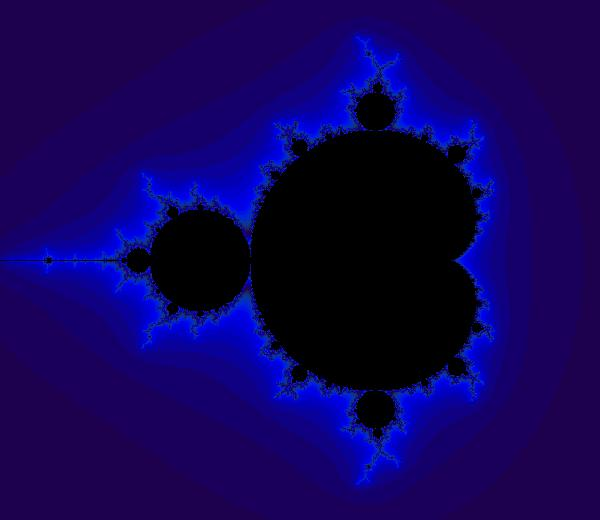

In [ ]:
#MandelBrot Set Example
import numpy as np
import pandas as pd
import tensorflow as tf
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt = 'jpeg'):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape) + [1])
  img = np.concatenate([10 + 20*np.cos(a_cyclic), 3- + 50*np.sin(a_cyclic), 155 - 80*np.cos(a_cyclic)], 2)
  img[a == a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data = f.getvalue()))

#Use NumPy to create a 2-D array of Complex Numbers
Y, X = np.mgrid[-1.3: 1.3: 0.005, -2: 1: 0.005]
Z = X + 1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

for i in range(200):
  zs_ = zs*zs + xs

  not_diverged = tf.abs(zs_) < 4
  zs.assign(zs_)
  ns.assign_add(tf.cast(not_diverged, tf.float32))

DisplayFractal(ns.numpy())